In [1]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../train-metadata.csv")

C:\Users\gabri\AppData\Local\Temp\ipykernel_35952\1391730136.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../train-metadata.csv")


## Integração de dados

### Não será feito uma integração

## Limpeza

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [4]:
# Jogar fora colunas que não contribuem para a análise

In [5]:
to_drop = ["attribution", "copyright_license"]

df.drop(to_drop, axis=1, inplace=True)

In [6]:
# Jogar colunas com muitos valores nulos, fora

In [7]:
to_drop = ["iddx_2", "iddx_3", "iddx_4", "iddx_5", "mel_mitotic_index", "mel_thick_mm", "lesion_id"]

df.drop(to_drop, axis=1, inplace=True)

In [8]:
# Eliminar coluna que há apenas um tipo de valor

In [9]:
df["image_type"].unique()

array(['TBP tile: close-up'], dtype=object)

In [10]:
df.drop(["image_type"], axis=1, inplace=True)

In [11]:
# Eliminar coluna que tem similar, porém mais simples para uma análise

In [12]:
df["tbp_lv_location_simple"].unique()

array(['Right Leg', 'Head & Neck', 'Torso Back', 'Torso Front',
       'Right Arm', 'Left Leg', 'Left Arm', 'Unknown'], dtype=object)

In [13]:
df["tbp_lv_location"].unique()

array(['Right Leg - Upper', 'Head & Neck', 'Torso Back Top Third',
       'Torso Front Top Half', 'Right Arm - Upper', 'Left Leg - Upper',
       'Torso Front Bottom Half', 'Left Arm - Upper', 'Right Leg',
       'Torso Back Middle Third', 'Right Arm - Lower',
       'Right Leg - Lower', 'Left Leg - Lower', 'Left Arm - Lower',
       'Unknown', 'Left Leg', 'Torso Back Bottom Third', 'Left Arm',
       'Right Arm', 'Torso Front', 'Torso Back'], dtype=object)

In [14]:
df.drop(["tbp_lv_location"], axis=1, inplace=True)

In [15]:
# Remoção de Coluna que talvez atrapalhe análise por alta quantidade distinta de valores categoricos 

In [16]:
df["iddx_full"].unique()

array(['Benign',
       'Benign::Benign epidermal proliferations::Lichen planus like keratosis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Junctional',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ',
       'Benign::Benign melanocytic proliferations::Nevus',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive',
       'Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis',
       'Benign::Benign epidermal proliferations::Seborrheic keratosis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Superficial',
       'Indeterminate::Indeterminate melanocytic prol

In [17]:
df["iddx_full"].value_counts()

iddx_full
Benign                                                                                                                                                           399991
Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark                                                                             228
Benign::Benign melanocytic proliferations::Nevus                                                                                                                    141
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular                                             98
Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm                                                                               64
Benign::Benign epidermal proliferations::Seborrheic keratosis                                                                                         

In [18]:
df.drop(["iddx_full"], axis=1, inplace=True)

In [19]:
df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'tbp_tile_type',
       'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C',
       'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext',
       'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',
       'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'iddx_1', 'tbp_lv_dnn_lesion_confidence'],
      dtype='object')

In [21]:
# Mais colunas com valores nulos

In [22]:
for col in df.columns:
    print(f"Coluna: {col} com {df[col].isna().sum()} valores nulos\n")

Coluna: isic_id com 0 valores nulos

Coluna: target com 0 valores nulos

Coluna: patient_id com 0 valores nulos

Coluna: age_approx com 2798 valores nulos

Coluna: sex com 11517 valores nulos

Coluna: anatom_site_general com 5756 valores nulos

Coluna: clin_size_long_diam_mm com 0 valores nulos

Coluna: tbp_tile_type com 0 valores nulos

Coluna: tbp_lv_A com 0 valores nulos

Coluna: tbp_lv_Aext com 0 valores nulos

Coluna: tbp_lv_B com 0 valores nulos

Coluna: tbp_lv_Bext com 0 valores nulos

Coluna: tbp_lv_C com 0 valores nulos

Coluna: tbp_lv_Cext com 0 valores nulos

Coluna: tbp_lv_H com 0 valores nulos

Coluna: tbp_lv_Hext com 0 valores nulos

Coluna: tbp_lv_L com 0 valores nulos

Coluna: tbp_lv_Lext com 0 valores nulos

Coluna: tbp_lv_areaMM2 com 0 valores nulos

Coluna: tbp_lv_area_perim_ratio com 0 valores nulos

Coluna: tbp_lv_color_std_mean com 0 valores nulos

Coluna: tbp_lv_deltaA com 0 valores nulos

Coluna: tbp_lv_deltaB com 0 valores nulos

Coluna: tbp_lv_deltaL com 0 val

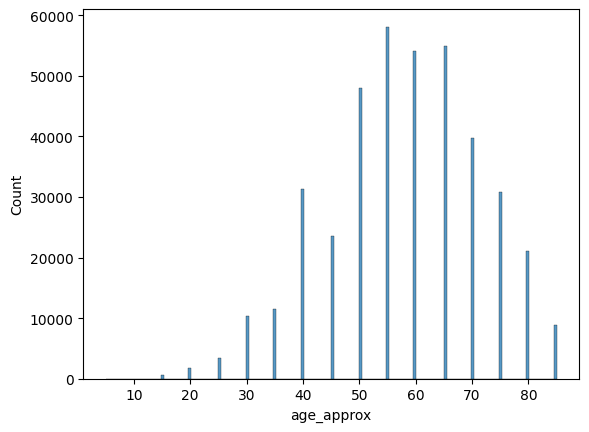

In [23]:
sns.histplot(data=df, x="age_approx")
plt.show()

In [24]:
# Como age_approx possui alguns valores nulos, substituí-los pela mediana pelo gráfico acima ter uma cauda
df["age_approx"] = pd.to_numeric(df["age_approx"], errors='coerce')
df["age_approx"] = df["age_approx"].astype("float64")
df["age_approx"].fillna(df["age_approx"].median(), inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_35952\2883616522.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age_approx"].fillna(df["age_approx"].median(), inplace=True)


In [25]:
query1 = """
    SELECT COUNT(1)
    FROM '../train-metadata.csv'
    WHERE tbp_lv_H < 25 OR tbp_lv_H > 75

"""

df_query1 = duckdb.query(query1).df()

df_query1

,count(1)
0,23


In [26]:
df["tbp_lv_H"].dropna(inplace=True)

In [27]:
df["tbp_lv_H"].isna().sum()

np.int64(0)

In [28]:
# Preencher Valor categorico com moda

In [29]:
moda = df["sex"].mode()[0]
df["sex"].fillna(moda, inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_35952\2968399675.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].fillna(moda, inplace=True)


In [30]:
moda = df["anatom_site_general"].mode()[0]
df["anatom_site_general"].fillna(moda, inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_35952\707346571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["anatom_site_general"].fillna(moda, inplace=True)


### Salvar arquivo

In [31]:
df.to_csv("./clean_dataset.csv", index=False)